# Pandas
Introduzione alla libreria **Pandas**.

# Descrizione del dataset

Il dataset è relativo a un impianto fotovoltaico reale di 960 kWP ubicato a Lecce. Il dataset:

- contiene circa 15000 record relativi a medie orarie su un periodo di poco meno di 2 anni (500 giorni);
-  la variabile **indipendente** è costituita dal vettore 6-dimensionale [Ora, Data, Temperatura ambiente, Temperatura dei moduli, Irraggiamento dei pannelli inclinati a 3 gradi, Irraggiamento dei pannelli inclinati a 15 gradi];
-  la **variabile dipendente** (valore *target*) è costituita dalla produzione in kWH dell'impianto in una determinata ora.

Di seguito vengono forniti i riferimenti per ulteriori approfondimenti:
- M. Malvoni, M. G. De Giorgi, P. M. Congedo, [*Data on photovoltaic powerforecasting models for Mediterranean climate*](https://www.sciencedirect.com/science/article/pii/S2352340916302773), Data in Brief, 2016.
- M. G. De Giorgi, M. Malvoni, P. M. Congedo, [*Comparison of strategies for multi-step ahead photovoltaic power forecasting models based on hybrid group method of data handling networks and least square support vector machine*](https://www.sciencedirect.com/science/article/abs/pii/S0360544216304261), Energy, 2016.

# Pandas
**Pandas** è una libreria python per la manipolazione e analisi di dati multidimensionali. Fornisce diversi metodi per la visualizzazione e analisi statistica dei dati e pertanto risulta molto utile per condurre un'esplorazione iniziale. È in grado di caricare dataset forniti nei formati più conosciuti ed è in grado di gestire feature eterogenee e serie temporali.

Il codice contenuto nella cella seguente esegue l'import della libreria. Per convenzione la libreria è solitamente importata con il nome **pd**.

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

Pandas è in grado di caricare dataset in formato CSV attraverso la funzione **read_csv(...)**. Questa funzione carica in memoria il contenuto del file restituendo una istanza della classe **DataFrame**. A differenza degli **ndarray**, nei **DataFrame** ogni colonna (feature) è identificata da un nome (definito nell'*header* del CSV) e ogni feature può essere di tipo differente.

La cella seguente mostra come richiamare **read_csv(...)** per caricare un dataset in memoria.

In [ ]:
filePath = './DBs/SolarPark/train.txt'

dataframe = pd.read_csv(filePath)
print(type(dataframe))

<class 'pandas.core.frame.DataFrame'>


## Esplorazione dei dati

La classe **DataFrame** espone diversi metodi per ottenere informazioni di sintesi riguardanti i dati appena caricati.

Il metodo **.info()** permette di stampare a video cardinalità, features e tipi di dati caricati.

In [ ]:
# Stampa di informazioni sulle features (colonne): cardinalità e tipo
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7902 entries, 0 to 7901
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time Frame  7902 non-null   int64  
 1   Date        7902 non-null   object 
 2   Ta (C)      7902 non-null   float64
 3   Tm (C)      7902 non-null   float64
 4   I3 (W/m2)   7902 non-null   float64
 5   I15 (W/m2)  7902 non-null   float64
 6   P (kW)      7902 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 432.3+ KB


Il metodo **.describe()** restituisce un insieme di informazioni statistiche riguardanti le diverse feature. Vengono riportati i valori minimi e massimi così come la media, la deviazione standard e il 25-, 50-, 75- e 100-percentile. Si noti come Jupyter sia in grado di individuare e formattare ad-hoc il risultato di **.describe()**.

In [ ]:
# Stampa delle statistiche aggregate sulle features
dataframe.describe()

# Jupyter gestisce direttamente il risultato di describe() presentandolo adeguatamente
# Si noti la differenza di output decommentando la seguente riga:
#print(dataframe.describe())

,Time Frame,Ta (C),Tm (C),I3 (W/m2),I15 (W/m2),P (kW)
count,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000
mean,12.492407,15.089675,17.755080,203.455206,214.903907,161.668209
std,6.917957,11.683758,16.641611,291.878650,306.698855,234.276655
min,1.000000,-1.460000,-7.130000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,15.535000,14.885000,8.545000,9.785000,4.295000
75%,18.000000,24.037500,28.637500,364.795000,380.785000,292.362500
max,24.000000,43.530000,70.140000,1031.550000,1051.230000,806.610000


Allo stesso modo è possibile visualizzare alcuni dei pattern relativi al **DataFrame**. 
L'output della cella seguente mostrerà alcuni dei primi e ultimi pattern del dataset. Da questa prima esplorazione risulta chiaro che i pattern sono ordinati temporalmente.

In [ ]:
dataframe

,Time Frame,Date,Ta (C),Tm (C),I3 (W/m2),I15 (W/m2),P (kW)
0,16,3/5/12 4:55 PM,13.01,12.05,52.47,53.08,6.50
1,17,3/5/12 5:55 PM,11.81,8.50,10.41,10.95,0.01
2,18,3/5/12 6:55 PM,10.33,5.68,0.00,0.00,0.00
3,19,3/5/12 7:55 PM,9.66,4.67,0.00,0.00,0.00
4,20,3/5/12 8:55 PM,8.91,3.82,0.00,0.00,0.00
...,...,...,...,...,...,...,...
7897,2,2/1/13 9:45 PM,0.00,0.00,0.00,0.00,0.00
7898,3,2/1/13 9:45 PM,0.00,0.00,0.00,0.00,0.00
7899,4,2/2/13 4:55 AM,10.25,6.83,0.00,0.00,0.00
7900,5,2/2/13 5:55 AM,10.54,8.06,0.00,0.00,0.00


In [ ]:
print(dataframe["Ta (C)"].values)

[13.01 11.81 10.33 ... 10.25 10.54 10.42]


Essendo Pandas ampiamente utilizzato in ambito Machine Learning e Data Science, son disponibili *plugin* o customizzazioni di Jupyter per permettere un'esplorazione più interattiva dei dati. Ad esempio, Google Colaboratory offre [un'estensione ad hoc](https://twitter.com/GoogleColab/status/1190349318617583616) per trattare la visualizzazione di **DataFrame**.

Inoltre, la classe **DataFrame** offre la possibilità di visualizzare graficamente la distribuzione dei valori delle feature sotto forma di istogrammi. Attraverso la visualizzazione grafica della distribuzione dei valori è possibile individuare tra le varie cose anomalie e la presenza di dati mancanti.

La visualizzazione grafica è demandata alla libreria Matplotlib.

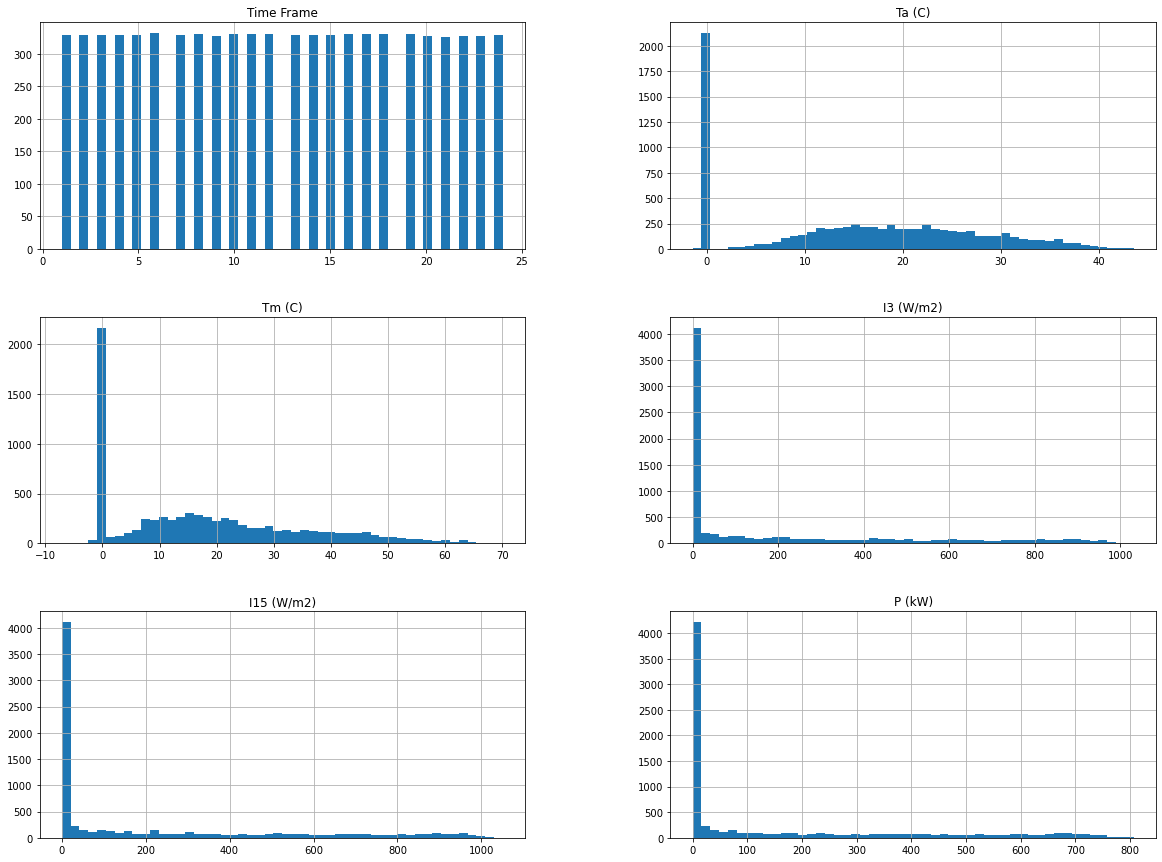

In [ ]:
# Visualizzazione grafica della distribuzione dei valori delle features (istogrammi)
dataframe.hist(bins=50, figsize=(20,15))
plt.show()

Durante la prima analisi dei dati può essere utile individuare eventuali correlazioni tra le diverse feature. È possibile utilizzare il metodo **.corr()** per calcolare i coefficienti di correlazione. Nella cella seguente verranno stampati a video i coefficienti relativi alla correlazione tra le diverse feature rispetto all'etichetta "P (kW)".

In [ ]:
# Calcolo dei coefficienti di correlazione tra le features
corr_matrix = dataframe.corr()

# Stampa dei coefficienti di correlazione tra le features e "P (kW)"
print(corr_matrix["I3 (W/m2)"].sort_values(ascending = False))

I3 (W/m2)     1.000000
I15 (W/m2)    0.994493
P (kW)        0.986053
Tm (C)        0.751344
Ta (C)        0.596926
Time Frame   -0.174459
Name: I3 (W/m2), dtype: float64


## Preprocessing dei dati
I dati contenuti nel **DataFrame** appena caricato non possono essere usati direttamente per l'addestramento di un modello di Machine Learning: la presenza di feature eterogenee (stringhe, interi e numeri floating point) deve essere gestita attraverso un'opportuna fase di *preprocessing*. In questa fase si avrà anche la possibilità di estrarre maggiori informazioni dai dati composti (come le date).

Ad esempio, la cella seguente mostra come sia possibile gestire le date (attualmente memorizzate sotto forma di stringa) per ottenere informazioni significative. La conversione da stringa a oggetto **Timestamp** è demandata alla funzione **to_datetime(...)**.

In [ ]:
# Ottiene la stringa Date (colonna 1) del primo pattern
datetime_str = dataframe.values[:,1][0]  
print('Stringa datetime:', datetime_str)

# Conversione da stringa a oggetto Timestamp
datetime = pd.to_datetime(datetime_str, format='%m/%d/%y %I:%M %p')
print(type(datetime))
print('Datetime nel formato "anno-mese-giorno orario":', datetime)

# Stampa di informazioni relative alla data
print('Giorno dell\'anno:', datetime.timetuple().tm_yday)
print('Mese dell\'anno:', datetime.month)

Stringa datetime: 3/5/12 4:55 PM
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
Datetime nel formato "anno-mese-giorno orario": 2012-03-05 16:55:00
Giorno dell'anno: 65
Mese dell'anno: 3


Per poter addestrare un modello di Machine Learning è necessario convertire i dati del **DataFrame** in valori numerici e memorizzarli in un **ndarray**. Durante questa procedura sarà possibile estrarre maggiori informazioni, come visto nella cella precedente.

La cella successiva converte il **DataFrame** iniziale in un **ndarray** e opzionalmente esegue alcune operazioni per estrarre alcune informazioni aggiuntive dalla data.

Si noti l'uso dell'operatore [**_c\[...\]**](https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html): questo permette di concatenare più **ndarray** ottenendone uno nuovo che contiene lo stesso numero di righe ma le cui colonne sono la concatenazione di quelle degli **ndarray** originali. Per comparazione, [**concatenate(...)**](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html) invece permette di concatenare più **ndarray** per riga.

In [ ]:
include_time_data = True

if include_time_data:
    datetime_strings = dataframe.values[:,1]
    
    # Converte tutte le stringhe in oggetti Timestamp
    datetimes = [pd.to_datetime(datetime, format='%m/%d/%y %I:%M %p') for datetime in datetime_strings]
    
    # Estrae alcune informazioni dagli oggetti Timestamp
    month = [datetime.month for datetime in datetimes]  # Meglio usare il mese se split temporale sequenziale
    yday = [datetime.timetuple().tm_yday for datetime in datetimes]  # Giorno dell'anno (se split random)
    # print(month)
    # print(yday)

# feature_x conterrà tutti i campi (esclusi Time Frame, Data e Potenza prodotta)
# Reminder: colonna 0 = Time Frame, colonna 1 = date, colonna 6 = potenza prodotta
feature_x = dataframe.values[:,2:6]

# Se include_time_data è True, include nel dataset anche le features relative alla data
# Nota: come orario è meglio utilizzare l'ordinale della colonna Time Frame (evita alcuni errori sui dati)
if include_time_data:
    #feature_x = np.c_[feature_x, dataframe.values[:,0]] # Include solamente il Time Frame
    feature_x = np.c_[feature_x, dataframe.values[:,0], month] # Include il Time Frame e il mese
    #feature_x = np.c_[feature_x, dataframe.values[:,0], yday] # Include il Time Frame e il giorno dell'anno
    
# Estrae le etichette dal dataframe
feature_y = dataframe.values[:,6]   # Colonna 6: "P (kW)"

# Cast di tutti i valori a float32
feature_x = feature_x.astype(np.float32)
feature_y = feature_y.astype(np.float32)

# Alcune stampe di riepilogo
print('Shape del dataset:', feature_x.shape)
print('Primo pattern del dataset:', feature_x[0])
print('Shape delle etichette:', feature_y.shape)
print('Etichetta del primo pattern:', feature_y[0])

Shape del dataset: (7902, 6)
Primo pattern del dataset: [13.01 12.05 52.47 53.08 16.    3.  ]
Shape delle etichette: (7902,)
Etichetta del primo pattern: 6.5


## Predizione all'ora successiva
In base al task da risolvere può essere richiesto di predire la quantità di energia prodotta nella stessa ora (ovvero l'etichetta dello stesso pattern) oppure di predire l'energia prodotta nell'ora successiva (ovvero l'etichetta del pattern successivo). Quest'ultimo scenario (*predict\_ahead*) risulta più interessante e può essere gestito assegnando a ogni pattern l'etichetta del pattern successivo.

Si noti come fino a questo punto i pattern del dataset non siano stati mescolati. In questa maniera è possibile modificare il dataset per allineare ogni pattern all'etichetta del pattern successivo utilizzando le istruzioni contenute nella seguente cella (in questo caso l'ultimo pattern verrà eliminato dal dataset).

In [ ]:
# Se predict_ahead è True i dati saranno preparati per lo scenario "predict_ahead"
predict_ahead = True

if predict_ahead:
    # Sfasa i dati: le prediction sono quelle dell'ora successiva
    data_x = feature_x[0:-1,:]
    data_y = feature_y[1:]
else:
    data_x = feature_x
    data_y = feature_y

print(len(data_x), len(data_y))    
# Nota: sfasando i dati si perde l'ultimo pattern

# Calcolo dei coefficienti di correlazione tra le features
corr_matrix = dataframe.corr()

# Stampa dei coefficienti di correlazione tra le features e "P (kW)"
print(corr_matrix["P (kW)"].sort_values(ascending = False))

7901 7901


## Split validation set
È possibile suddividere il dataset originale in train e validation set secondo due differenti strategie:
- la suddivisione casuale consiste nel selezionare casualmente i pattern da inserire nei due differenti set;
- la suddivisione temporale consiste nel suddividere il set originale in due parti non sovrapposte temporalmente.

Considerato che i pattern sono ordinati temporalmente, è possibile eseguire la seconda strategia operando un semplice *slicing* dei dati.

In [ ]:
valid_portion = 0.5
split_random = False

if split_random:
    # Split casuale di train e validation set
    train_x, validation_x, train_y, validation_y = train_test_split(data_x, data_y, test_size=valid_portion, random_state=1)
else:    
    # Split temporale
    train_x, validation_x, train_y, validation_y = train_test_split(data_x, data_y, test_size=valid_portion, shuffle=False)